In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import tree
from sklearn import naive_bayes

In [3]:
df = pd.read_excel('dados_cerveja_nota.xlsx')

In [6]:
df.head()

,id,cerveja,nota
0,1,1,0.75
1,2,1,3.00
2,3,2,1.75
3,4,3,1.75
4,5,4,4.20


In [10]:
df['aprovado'] = (df['nota'] > 5).astype(int)
df

,id,cerveja,nota,aprovado
0,1,1,0.75,0
1,2,1,3.00,0
2,3,2,1.75,0
3,4,3,1.75,0
4,5,4,4.20,0
5,6,4,6.50,1
6,7,5,2.90,0
7,8,6,6.20,1
8,9,6,7.00,1
9,10,7,6.20,1


Text(0, 0.5, 'Aprovado')

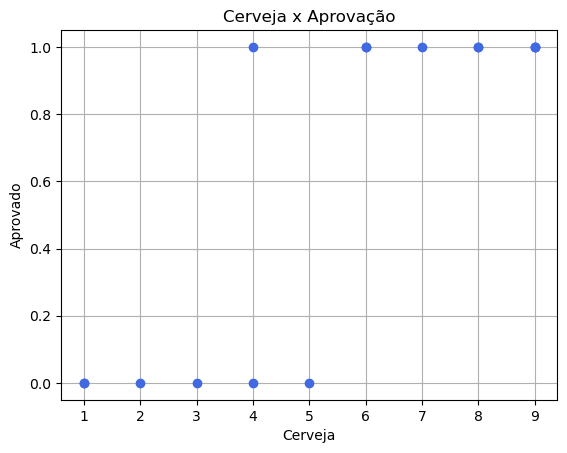

In [16]:
plt.plot(df['cerveja'], df['aprovado'], 'o', color='royalblue')
plt.grid(True)
plt.title('Cerveja x Aprovação')
plt.xlabel('Cerveja')
plt.ylabel('Aprovado')

In [40]:
reg = linear_model.LogisticRegression(penalty=None, fit_intercept=True) # duvida o que são esses hiperparametros
reg.fit(df[['cerveja']], df['aprovado'])
reg_predict = reg.predict(df[['cerveja']].drop_duplicates())
reg_prob = reg.predict_proba(df[['cerveja']].drop_duplicates())[:,1]

In [42]:
arvore_full = tree.DecisionTreeClassifier(random_state=42)
arvore_full.fit(df[['cerveja']], df['aprovado'])
arvore_full_predict = arvore_full.predict(df[['cerveja']].drop_duplicates())
arvore_prob = arvore_full.predict_proba(df[['cerveja']].drop_duplicates())[:,1]

In [43]:
arvore_d2 = tree.DecisionTreeClassifier(random_state=42, max_depth=2)
arvore_d2.fit(df[['cerveja']], df['aprovado'])
arvore_d2_predict = arvore_d2.predict(df[['cerveja']].drop_duplicates())
arvore_d2_prob = arvore_d2.predict_proba(df[['cerveja']].drop_duplicates())[:,1]

In [53]:
nb = naive_bayes.GaussianNB()
nb.fit(df[['cerveja']], df['aprovado'])
nb_predict = nb.predict(df[['cerveja']].drop_duplicates())
nb_prob = nb.predict_proba(df[['cerveja']].drop_duplicates())[:,1]

In [23]:
reg_predict

array([0, 0, 0, 0, 1, 1, 1, 1, 1])

In [36]:
arvore_full_predict

array([0, 0, 0, 0, 0, 1, 1, 1, 1])

Text(0, 0.5, 'Aprovado')

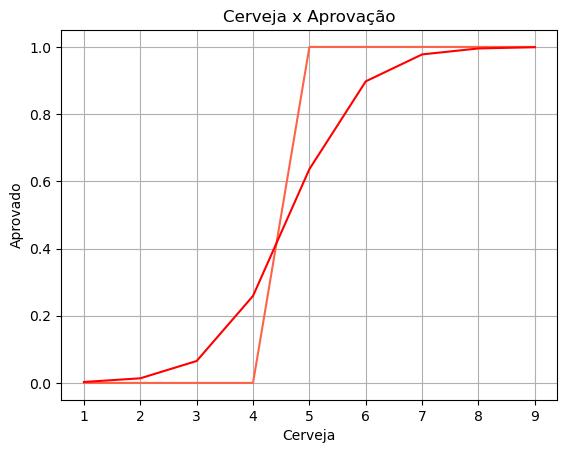

In [45]:
plt.plot(df[['cerveja']].drop_duplicates(), reg_predict, color='tomato')
plt.plot(df[['cerveja']].drop_duplicates(), reg_prob, color='red')
plt.grid(True)
plt.title('Cerveja x Aprovação')
plt.xlabel('Cerveja')
plt.ylabel('Aprovado')

Text(0, 0.5, 'Aprovado')

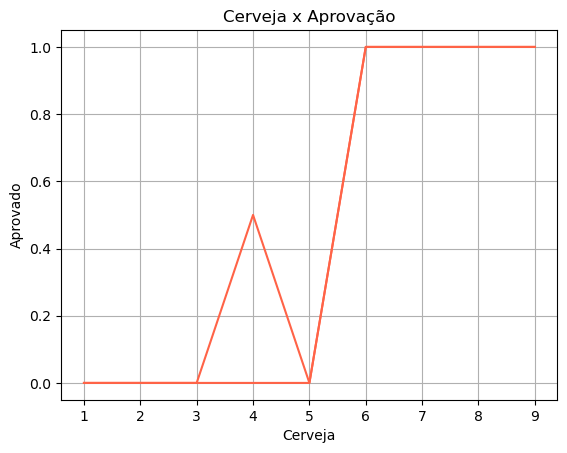

In [46]:
plt.plot(df[['cerveja']].drop_duplicates(), arvore_full_predict, color='tomato')
plt.plot(df[['cerveja']].drop_duplicates(), arvore_prob, color='tomato')
plt.grid(True)
plt.title('Cerveja x Aprovação')
plt.xlabel('Cerveja')
plt.ylabel('Aprovado')

Text(0, 0.5, 'Aprovado')

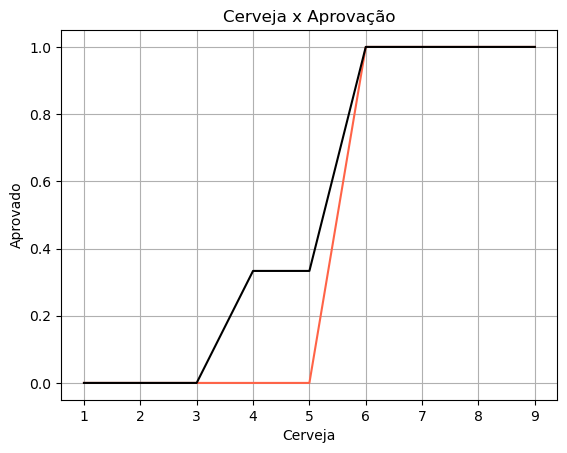

In [49]:
plt.plot(df[['cerveja']].drop_duplicates(), arvore_d2_predict, color='tomato')
plt.plot(df[['cerveja']].drop_duplicates(), arvore_d2_prob, color='black')
plt.grid(True)
plt.title('Cerveja x Aprovação')
plt.xlabel('Cerveja')
plt.ylabel('Aprovado')

Text(0, 0.5, 'Aprovado')

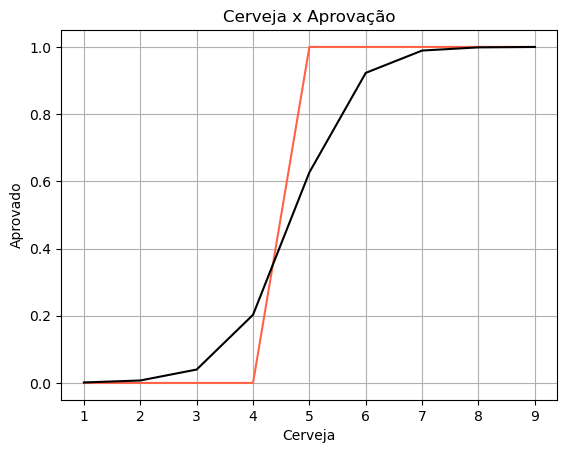

In [55]:
plt.plot(df[['cerveja']].drop_duplicates(), nb_predict, color='tomato')
plt.plot(df[['cerveja']].drop_duplicates(), nb_prob, color='black')
plt.grid(True)
plt.title('Cerveja x Aprovação')
plt.xlabel('Cerveja')
plt.ylabel('Aprovado')